In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# path = "../data/raw/web_download.xlsx"
path = "../data/raw/608DE39_ALL_LATEST.csv"
# df = pd.read_excel(path, sheet_name=1)
df = pd.read_csv(path)
data = pd.read_csv(path)

In [24]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,RATE_PER_100_N,RATE_PER_100_NL,RATE_PER_100_NU
0,608DE39NCD_HYP_PREVALENCE_A,NCD_HYP_PREVALENCE_A,608DE39,NCD_HYP_PREVALENCE_A,2009,YEAR,792,COUNTRY,PUBLISHED,Hypertension in adults (age 30 to 79),Türkiye,FEMALE,38.8,35.7,42.2
1,608DE39NCD_HYP_PREVALENCE_A,NCD_HYP_PREVALENCE_A,608DE39,NCD_HYP_PREVALENCE_A,2007,YEAR,854,COUNTRY,PUBLISHED,Hypertension in adults (age 30 to 79),Burkina Faso,FEMALE,33.2,25.0,42.0
2,608DE39NCD_HYP_PREVALENCE_A,NCD_HYP_PREVALENCE_A,608DE39,NCD_HYP_PREVALENCE_A,2007,YEAR,262,COUNTRY,PUBLISHED,Hypertension in adults (age 30 to 79),Djibouti,FEMALE,37.5,25.9,50.5
3,608DE39NCD_HYP_PREVALENCE_A,NCD_HYP_PREVALENCE_A,608DE39,NCD_HYP_PREVALENCE_A,1995,YEAR,266,COUNTRY,PUBLISHED,Hypertension in adults (age 30 to 79),Gabon,FEMALE,35.6,23.0,49.1
4,608DE39NCD_HYP_PREVALENCE_A,NCD_HYP_PREVALENCE_A,608DE39,NCD_HYP_PREVALENCE_A,1995,YEAR,288,COUNTRY,PUBLISHED,Hypertension in adults (age 30 to 79),Ghana,FEMALE,36.9,27.5,46.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  19230 non-null  object 
 1   IND_CODE                19230 non-null  object 
 2   IND_UUID                19230 non-null  object 
 3   IND_PER_CODE            19230 non-null  object 
 4   DIM_TIME                19230 non-null  int64  
 5   DIM_TIME_TYPE           19230 non-null  object 
 6   DIM_GEO_CODE_M49        19230 non-null  int64  
 7   DIM_GEO_CODE_TYPE       19230 non-null  object 
 8   DIM_PUBLISH_STATE_CODE  19230 non-null  object 
 9   IND_NAME                19230 non-null  object 
 10  GEO_NAME_SHORT          19230 non-null  object 
 11  DIM_SEX                 19230 non-null  object 
 12  RATE_PER_100_N          19230 non-null  float64
 13  RATE_PER_100_NL         19230 non-null  float64
 14  RATE_PER_100_NU         19230 non-null

In [49]:
# Verificar duplicatas considerando todas as colunas
duplicatas = df[df.duplicated()]

print(f"Número total de linhas duplicadas: {len(duplicatas)}")

Número total de linhas duplicadas: 0


In [50]:
# Verificar duplicatas baseadas em país, sexo e ano
colunas_chave = ['GEO_NAME_SHORT', 'DIM_SEX', 'DIM_TIME']
duplicatas_chave = df[df.duplicated(subset=colunas_chave, keep=False)]

print(f"Número de duplicatas baseadas em país, sexo e ano: {len(duplicatas_chave)}")
print("\nExemplos de duplicatas:")
print(duplicatas_chave.head())

Número de duplicatas baseadas em país, sexo e ano: 0

Exemplos de duplicatas:
Empty DataFrame
Columns: [IND_ID, IND_CODE, IND_UUID, IND_PER_CODE, DIM_TIME, DIM_TIME_TYPE, DIM_GEO_CODE_M49, DIM_GEO_CODE_TYPE, DIM_PUBLISH_STATE_CODE, IND_NAME, GEO_NAME_SHORT, DIM_SEX, RATE_PER_100_N, RATE_PER_100_NL, RATE_PER_100_NU]
Index: []


In [51]:
# Agrupar duplicatas e verificar se há valores diferentes para a taxa de prevalência
inconsistencias = duplicatas_chave.groupby(colunas_chave)['RATE_PER_100_N'].nunique()
inconsistencias = inconsistencias[inconsistencias > 1]

print("\nInconsistências nas taxas de prevalência:")
print(inconsistencias)


Inconsistências nas taxas de prevalência:
Series([], Name: RATE_PER_100_N, dtype: int64)


In [52]:
# Manter o registro mais recente em caso de duplicatas
df_sem_duplicatas = df.sort_values('DIM_TIME', ascending=False).drop_duplicates(subset=colunas_chave, keep='first')

print(f"\nNúmero de linhas após remoção de duplicatas: {len(df_sem_duplicatas)}")


Número de linhas após remoção de duplicatas: 19230


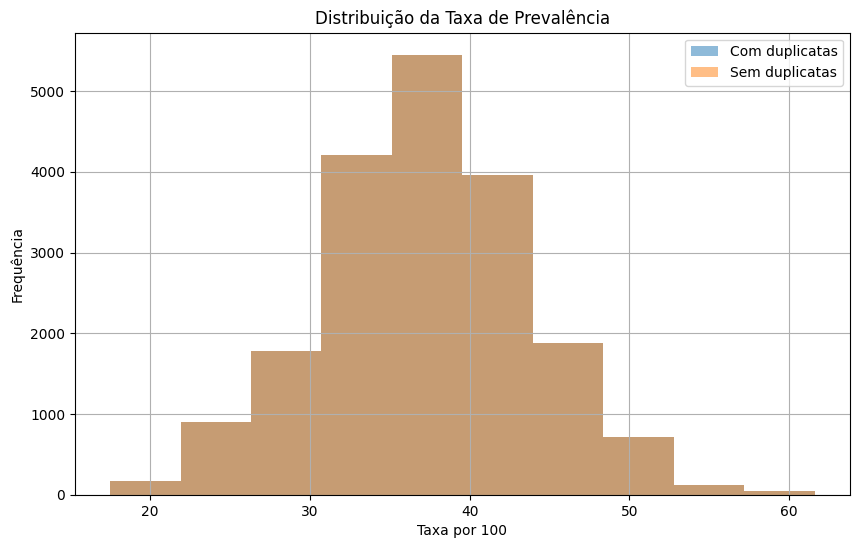

In [62]:
# Comparar a distribuição de prevalência antes e depois da remoção de duplicatas
plt.figure(figsize=(10, 6))
df['RATE_PER_100_N'].hist(alpha=0.5, label='Com duplicatas')
df_sem_duplicatas['RATE_PER_100_N'].hist(alpha=0.5, label='Sem duplicatas')
plt.legend()
plt.title('Distribuição da Taxa de Prevalência')
plt.xlabel('Taxa por 100')
plt.ylabel('Frequência')
# plt.savefig('../data/processed/distribuicao_prevalencia_duplicatas.png')
plt.show()
plt.close()

In [ ]:
# Filtrando apenas os dados de mulheres
df_female = df[df['DIM_SEX'] == 'FEMALE']
df_female

In [28]:

# Calculando a média global de prevalência
mean_prevalence = df_female['RATE_PER_100_N'].mean()
print(f"Média global de prevalência de hipertensão em mulheres: {mean_prevalence:.2f}%")

Média global de prevalência de hipertensão em mulheres: 36.33%


In [29]:
# Países com maior prevalência
top_countries = df_female.nlargest(10, 'RATE_PER_100_N')
print("\nPaíses com maior prevalência de hipertensão em mulheres:")
print(top_countries[['GEO_NAME_SHORT', 'RATE_PER_100_N']])



Países com maior prevalência de hipertensão em mulheres:
           GEO_NAME_SHORT  RATE_PER_100_N
5149   Russian Federation            53.1
630   Republic of Moldova            52.7
5331   Russian Federation            52.6
4327  Republic of Moldova            52.4
124               Belarus            52.3
1739   Russian Federation            52.1
3278             Paraguay            52.0
5100  Republic of Moldova            52.0
5265             Paraguay            52.0
4404             Paraguay            51.9


In [30]:
# Países com menor prevalência
bottom_countries = df_female.nsmallest(10, 'RATE_PER_100_N')
print("\nPaíses com menor prevalência de hipertensão em mulheres:")
print(bottom_countries[['GEO_NAME_SHORT', 'RATE_PER_100_N']])


Países com menor prevalência de hipertensão em mulheres:
     GEO_NAME_SHORT  RATE_PER_100_N
4826    Switzerland            17.5
2636    Switzerland            17.9
903     Switzerland            18.4
3930           Peru            18.4
1180           Peru            18.5
3206           Peru            18.5
3673           Peru            18.5
1188           Peru            18.6
5782           Peru            18.7
5842           Peru            18.7


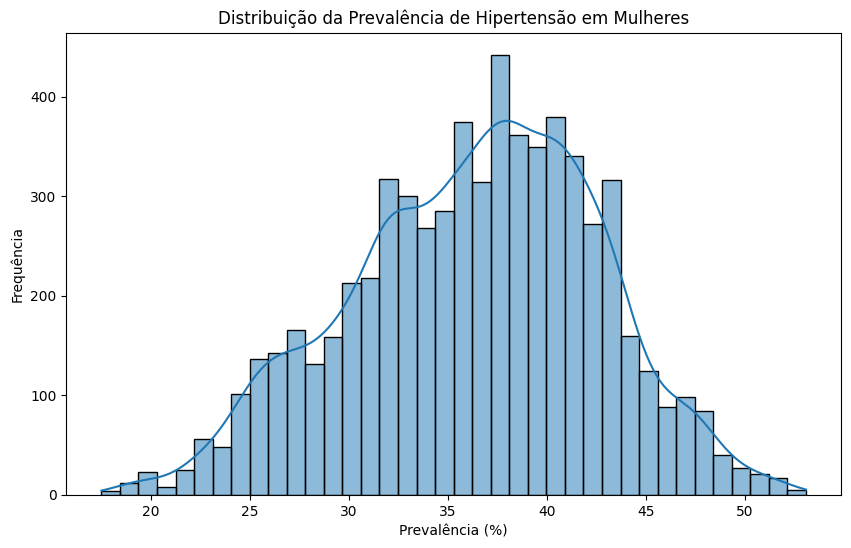

In [64]:
# Histograma da prevalência
plt.figure(figsize=(10, 6))
sns.histplot(df_female['RATE_PER_100_N'], kde=True)
plt.title('Distribuição da Prevalência de Hipertensão em Mulheres')
plt.xlabel('Prevalência (%)')
plt.ylabel('Frequência')
# plt.savefig('data/processed/histograma_prevalencia.png')
plt.show()
plt.close()


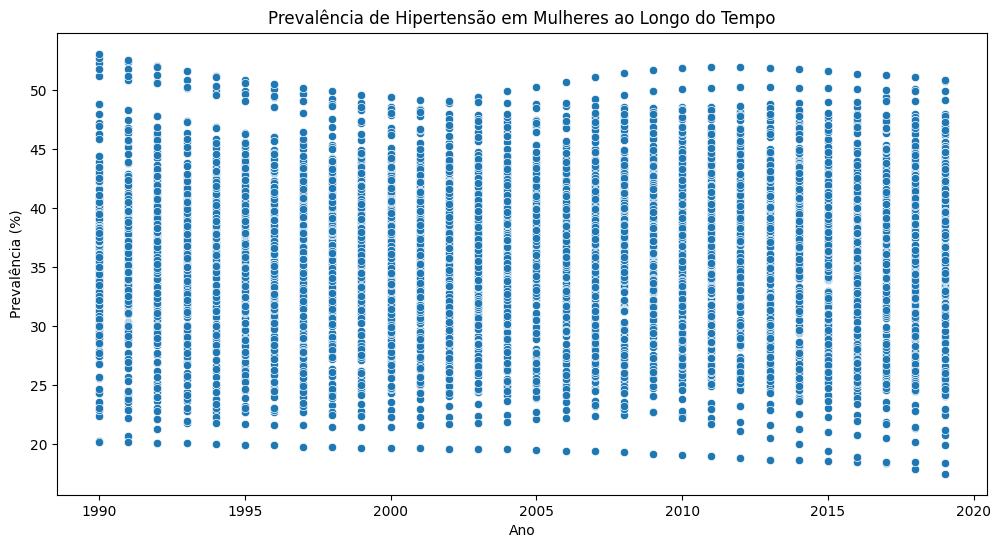

In [65]:

# Gráfico de dispersão: Prevalência vs. Ano
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_female, x='DIM_TIME', y='RATE_PER_100_N')
plt.title('Prevalência de Hipertensão em Mulheres ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Prevalência (%)')
# plt.savefig('data/processed/prevalencia_tempo.png')
plt.show()
plt.close()



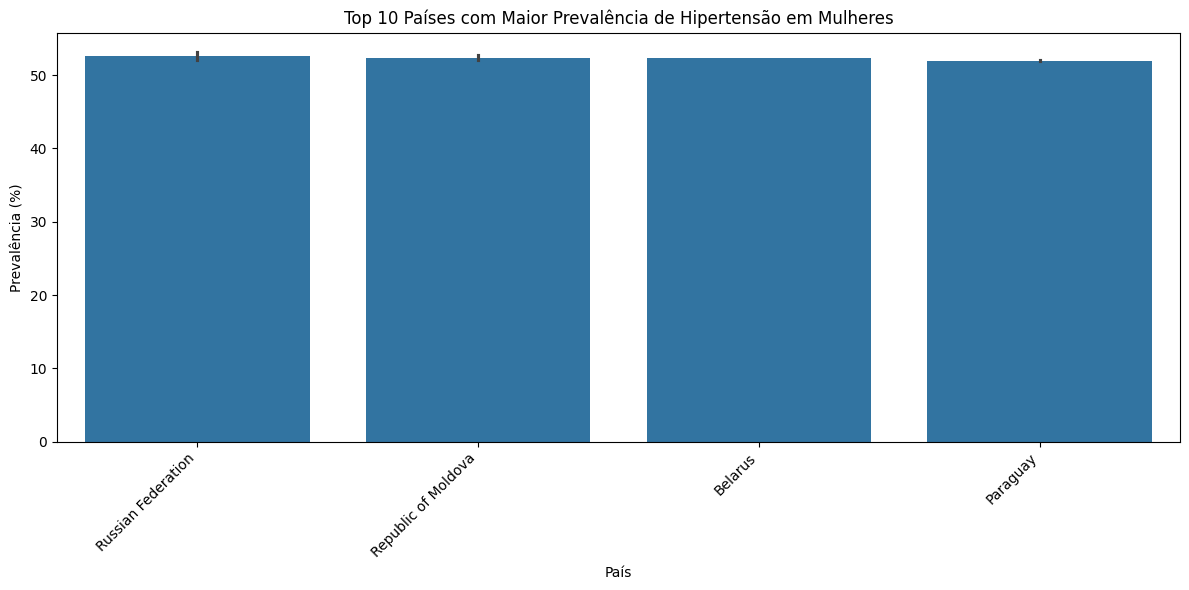

In [66]:
# Top 10 países com maior prevalência (gráfico de barras)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='GEO_NAME_SHORT', y='RATE_PER_100_N')
plt.title('Top 10 Países com Maior Prevalência de Hipertensão em Mulheres')
plt.xlabel('País')
plt.ylabel('Prevalência (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('data/processed/top10_paises.png')
plt.show()
plt.close()

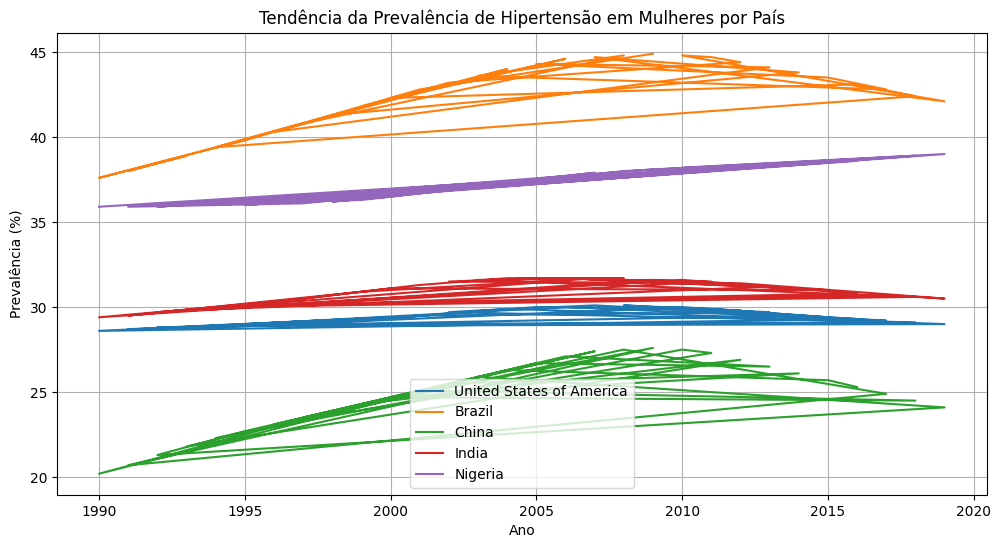

In [67]:
# Selecionando alguns países para análise
countries_of_interest = ['United States of America', 'Brazil', 'China', 'India', 'Nigeria']

# Filtrando o DataFrame
df_selected = df_female[df_female['GEO_NAME_SHORT'].isin(countries_of_interest)]

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_selected[df_selected['GEO_NAME_SHORT'] == country]
    plt.plot(country_data['DIM_TIME'], country_data['RATE_PER_100_N'], label=country)

plt.title('Tendência da Prevalência de Hipertensão em Mulheres por País')
plt.xlabel('Ano')
plt.ylabel('Prevalência (%)')
plt.legend()
plt.grid(True)
# plt.savefig('data/processed/tendencia_paises.png')
plt.show()
plt.close()